In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, load_boston
from sklearn.model_selection import train_test_split

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

In [2]:
diabetes_ds = load_diabetes()
X = diabetes_ds.data
Y = diabetes_ds.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [3]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

In [4]:
generator = GeneticFeatureGenerator(
    X_train, 
    Y_train, 
    [add, sub, mul, div], 
    operation_names = ["+", "-", "*", "/"], 
    popsize = 100, 
    maxiter = 60, 
    clone_prob = 0.1, 
    mutation_rate = 0.05
)

In [5]:
res = generator.optimize()

Generation initialized
Generation:  0
Best fitness:  0.42940121853734176
Worst fitness:  0.0
Mean fitness:  0.1647630298786286
Median fitness:  0.17810745357701518
Std fitness:  0.11220160737865678

Generation:  1
Best fitness:  0.42940121853734176
Worst fitness:  0.0
Mean fitness:  0.20538224117355292
Median fitness:  0.19299666381760583
Std fitness:  0.1182140775113896

Generation:  2
Best fitness:  0.42940121853734176
Worst fitness:  0.0
Mean fitness:  0.24280691334495452
Median fitness:  0.2172070678789041
Std fitness:  0.10545236135158462

Generation:  3
Best fitness:  0.4592012745135865
Worst fitness:  0.0
Mean fitness:  0.28448372156064833
Median fitness:  0.3380614554660666
Std fitness:  0.10471612651588288

Generation:  4
Best fitness:  0.46493407122099134
Worst fitness:  0.0
Mean fitness:  0.2972606791159215
Median fitness:  0.3364469135968644
Std fitness:  0.0974189174835127

Generation:  5
Best fitness:  0.4739223178854833
Worst fitness:  0.0
Mean fitness:  0.32011966770110

In [6]:
print(res)

+
	+
		+
			+
				+
					*
						+
							+
								DataNode 8
								+
									/
										ScalarNode 0.2217950690292958
										ScalarNode 0.9067767426701895
									+
										+
											+
												+
													+
														DataNode 7
														+
															*
																ScalarNode 0.7296311232831735
																-
																	DataNode 2
																	/
																		ScalarNode 0.002089682504025414
																		ScalarNode 0.005987716877872917
															DataNode 2
													DataNode 5
												ScalarNode 0.8722253924438558
											+
												DataNode 2
												DataNode 2
										+
											DataNode 7
											DataNode 2
							+
								DataNode 8
								DataNode 8
						*
							*
								ScalarNode 0.9780432120082027
								*
									DataNode 7
									DataNode 5
							*
								/
									DataNode 0
									ScalarNode 0.5641356280138575
								+
									ScalarNode 0.06540799262843289
									DataNo

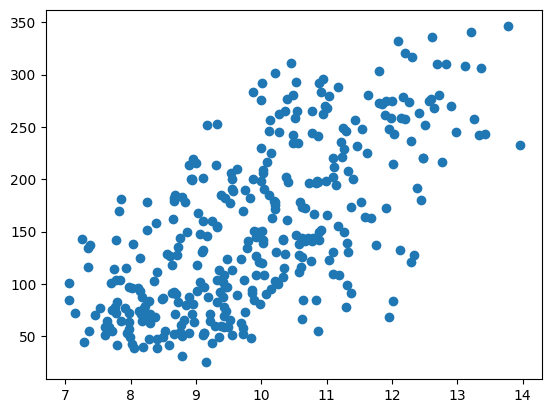

In [7]:
new_col = res(X_train)
new_col_test = res(X_test)
plt.scatter(new_col, Y_train)

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
print("RF score: ", rf.score(X_test, Y_test))

rf.fit(np.hstack((X_train, new_col.reshape(-1, 1))), Y_train)
print("RF score with new feature: ", rf.score(np.hstack((X_test, new_col_test.reshape(-1, 1))), Y_test))


RF score:  0.43078612362766067
RF score with new feature:  0.4971040335780832
